# The Scientific Python Ecosystem

The Scientific Python Ecosystem is made up of a robust collection of packages that provide functionality for everything from simple numeric arrays to sophisticated machine learning algorithms. In this notebook, we'll introduce the core scientific python packages and some important terminology.

![](stack.png)

### Outline
- Python
- Numpy
- Scipy
- Pandas

### Tutorial Duriation
10 minutes

### Going Further

This notebook is just meant to make sure we all have the same base terminology before moving on to the fun `xarray` and `dask`. If you are new to Python or just want to brush up, you may be interested in the following online resources:

- Scientific Python Lectures: http://scipy-lectures.org/
- Numpy Tutorial: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
- Scipy Tutorial: https://docs.scipy.org/doc/scipy/reference/tutorial/index.html
- Pandas Tutorials: https://pandas.pydata.org/pandas-docs/stable/tutorials.html

## Python built-ins

In [1]:
# data types
x = 4
type(x)

int

In [2]:
pi = 3.14
type(pi)

float

In [3]:
name = 'my string'
type(name)

str

In [4]:
# data structures / objects

my_list = [2, 4, 10]  # a list

my_list[2]  # access by position

10

In [5]:
my_dict = {'pi': 3.14, 'd': 4}  # a dictionary


my_dict['pi']  # access by key

3.14

## Numpy

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

In [6]:
import numpy as np

In [7]:
x = np.zeros(shape=(4, 5))
x

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [8]:
y = x + 4
y

array([[ 4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.],
       [ 4.,  4.,  4.,  4.,  4.]])

In [9]:
# random numbers
z = np.random.random(x.shape)
z

array([[ 0.13779861,  0.8676394 ,  0.23697648,  0.41442422,  0.44140481],
       [ 0.06719911,  0.2180653 ,  0.43086649,  0.59974811,  0.54015864],
       [ 0.37736177,  0.641568  ,  0.68516834,  0.747375  ,  0.12842424],
       [ 0.12372683,  0.09025636,  0.43894215,  0.64891309,  0.82162263]])

In [10]:
# aggregations
z_sum = z.sum(axis=1)
z_sum

array([ 2.09824353,  1.85603764,  2.57989735,  2.12346106])

In [11]:
# broadcasting
y.transpose() * z_sum

array([[  8.39297411,   7.42415055,  10.3195894 ,   8.49384424],
       [  8.39297411,   7.42415055,  10.3195894 ,   8.49384424],
       [  8.39297411,   7.42415055,  10.3195894 ,   8.49384424],
       [  8.39297411,   7.42415055,  10.3195894 ,   8.49384424],
       [  8.39297411,   7.42415055,  10.3195894 ,   8.49384424]])

In [12]:
# slicing
z[2:4, ::2]  # 2-4 on the first axis, stride of 2 on the second

array([[ 0.37736177,  0.68516834,  0.12842424],
       [ 0.12372683,  0.43894215,  0.82162263]])

In [13]:
# data types

xi = np.array([1, 2, 3], dtype=np.int)  # integer
xi.dtype

dtype('int64')

In [14]:
xf = np.array([1, 2, 3], dtype=np.float)  # float
xf.dtype

dtype('float64')

In [15]:
# universal functions (ufuncs, e.g. sin, cos, exp, etc)
np.sin(z_sum)


array([ 0.86409478,  0.95959378,  0.53262179,  0.85112867])

### Pandas

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

In [16]:
import pandas as pd

In [17]:
import statsmodels as sm  # We'll use the statsmodels package to get some "real" data

In [18]:
co2 = sm.datasets.co2.load_pandas().data 

In [19]:
# co2 is a pandas.DataFrame
co2.head()  # head just prints out the first few rows

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [20]:
# The pandas DataFrame is made up of an index
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [21]:
# and 0 or more columns (in this case just 1 - co2)
# Each column is a pandas.Series
co2['co2'].head()  


1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
Freq: W-SAT, Name: co2, dtype: float64

In [22]:
# label based slicing
co2['1990-01-01': '1990-02-14']

,co2
1990-01-06,353.4
1990-01-13,353.5
1990-01-20,353.8
1990-01-27,353.9
1990-02-03,354.1
1990-02-10,355.0


In [23]:
# aggregations just like in numpy
co2.mean(axis=0)

co2    340.142247
dtype: float64

In [24]:
# advanced grouping/resampling

# here we'll calculate the annual average timeseris of co2 concentraions
co2_as = co2.resample('AS').mean()  # AS is for the start of each year

co2_as.head()

,co2
1958-01-01,315.420000
1959-01-01,315.906250
1960-01-01,316.860377
1961-01-01,317.592308
1962-01-01,318.545833


In [25]:
# we can also quickly calculate the monthly climatology

co2_climatology = co2.groupby(co2.index.month).mean()
co2_climatology

,co2
1,339.779787
2,341.091617
3,341.638587
4,342.092308
5,343.132086
6,342.641989
7,340.608854
8,338.698947
9,337.496739
10,337.205236


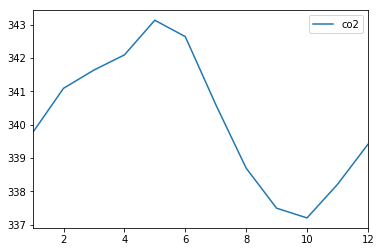

In [26]:
%matplotlib inline

# and even plot that using pandas and matplotlib
co2_climatology.plot()